# Kepler Analysis
#### Dillon Bass, 2/13/25

## Setup and Data Reading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import math
warnings.filterwarnings("ignore")

In [3]:
starspath = 'keplerstars.txt'
starsall = pd.read_fwf(
    starspath,
    skiprows=204,
    header=0 )
starsall.columns = [col.strip("| ").strip() for col in starsall.columns]
starsall2 = starsall.iloc[5:].reset_index(drop=True)
starsall2['teff'] = pd.to_numeric(starsall2['teff'], errors='coerce')
starsall2['logg'] = pd.to_numeric(starsall2['logg'], errors='coerce')
starsall2['kepmag'] = pd.to_numeric(starsall2['kepmag'], errors='coerce')
starsall2 = starsall2.dropna(subset=['teff', 'logg', 'kepmag'])

# make the suggested cuts for Teff, log g, and kepler magnitude  'logg':[4, 4.9], 'teff':[4100, 6100], 'kepmag': < 15. 
stars_teff_cut = starsall2.loc[(starsall2['teff'] >= 4100) & (starsall2['teff'] <= 6100)]
stars_logg_cut = stars_teff_cut.loc[(stars_teff_cut['logg'] >= 4) & (stars_teff_cut['logg'] <= 4.9)]
stars = stars_logg_cut.loc[stars_logg_cut['kepmag'] < 15] 

In [4]:
stars

,,kepid,Unnamed: 2,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,...,timeout06p0,timeout07p5,timeout09p0,timeout10p5,timeout12p0,timeout12p5,timeout15p0,timeoutsumry,cdppslplong,cdppslpshrt
2,NaN,10000827,2MASS,J19065980+4657282,5648,152,-169,4.559,0.038,-0.162,...,0,0,0,0,0,0,0,1,-0.45278,-0.71950
3,NaN,10000876,2MASS,J19070870+4657343,5249,157,-157,4.410,0.132,-0.198,...,0,0,0,0,0,0,0,1,-0.34072,-0.70052
5,NaN,10000941,2MASS,J19071664+4654420,5115,154,-139,4.477,0.095,-0.105,...,0,0,0,0,0,0,0,1,0.24505,-0.34783
6,NaN,10000962,2MASS,J19071924+4654297,5496,166,-149,4.592,0.036,-0.135,...,0,0,0,0,0,0,0,1,-0.41973,-0.71827
7,NaN,10000976,2MASS,J19072105+4654426,5629,152,-169,4.546,0.033,-0.176,...,0,0,0,0,0,0,0,1,-0.12136,-0.55216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200001,NaN,9965597,2MASS,J19491311+4650133,5381,160,-160,4.478,0.108,-0.162,...,0,0,0,0,0,0,0,1,0.16974,-0.37216
200003,NaN,9965789,2MASS,J19492406+4648148,5991,160,-195,4.484,0.052,-0.221,...,0,0,0,0,0,0,0,1,-0.40356,-0.70072
200006,NaN,9969943,2MASS,J19541839+4652064,5818,175,-192,4.470,0.067,-0.189,...,0,0,0,0,0,0,0,1,-0.36617,-0.69549
200027,NaN,9992816,2MASS,J18475850+4656386,5955,161,-179,4.520,0.044,-0.187,...,0,0,0,0,0,0,0,1,-0.07331,-0.48884


In [5]:
list(stars.columns)

['',
 'kepid',
 'Unnamed: 2',
 'tm_designation',
 'teff',
 'teff_err1',
 'teff_err2',
 'logg',
 'logg_err1',
 'logg_err2',
 'feh',
 'feh_err1',
 'feh_err2',
 'mass',
 'mass_err1',
 'mass_err2',
 'radius',
 'radius_err1',
 'radius_err2',
 'dens',
 'dens_err1',
 'dens_err2',
 'prov_sec',
 'kepmag',
 'limbdark_coeff1',
 'limbdark_coeff2',
 'limbdark_coeff3',
 'limbdark_coeff4',
 'dist',
 'dist_err1',
 'dist_err2',
 'nconfp',
 'nkoi',
 'ntce',
 'datalink_dvr',
 'st_delivname',
 'st_vet_date_str',
 'ra',
 'dec',
 'st_quarters',
 'teff_prov',
 'logg_prov',
 'feh_prov',
 'jmag',
 'jmag_err',
 'hmag',
 'hmag_err',
 'kmag',
 'kmag_err',
 'dutycycle',
 'dataspan',
 'mesthres01p5',
 'mesthres02p0',
 'mesthres02p5',
 'mesthres03p0',
 'mesthres03p5',
 'mesthres04p5',
 'mesthres05p0',
 'mesthres06p0',
 'mesthres07p5',
 'mesthres09p0',
 'mesthres10p5',
 'mesthres12p0',
 'mesthres12p5',
 'mesthres15p0',
 'rrmscdpp01p5',
 'rrmscdpp02p0',
 'rrmscdpp02p5',
 'rrmscdpp03p0',
 'rrmscdpp03p5',
 'rrmscdpp04p5

In [6]:
koispath = 'allkeplerois.csv'
koisall = pd.read_csv(koispath, skiprows=range(0, 55), header=0, comment='#',engine='python')

In [7]:
# we can just filter out all the 'FALSE POSITIVE' flagged candidates.
kois = (koisall[(koisall['koi_pdisposition'].isin(['CONFIRMED', 'CANDIDATE'])) & (koisall['koi_pdisposition'] != 'FALSE POSITIVE')]).reset_index(drop=True)
list(set(list(kois['koi_disposition'])))

['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE']

In [8]:
kois

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,9938836,K07978.01,NaN,CANDIDATE,CANDIDATE,0.843,0,0,0,0,...,-242.0,3.890,0.405,-0.135,2.219,0.536,-0.996,285.30768,46.829803,13.729
4713,10011213,K07982.01,NaN,CANDIDATE,CANDIDATE,0.189,0,0,0,0,...,-225.0,4.488,0.054,-0.216,0.955,0.291,-0.097,291.60455,46.973289,15.632
4714,10028127,K08193.01,NaN,CANDIDATE,CANDIDATE,0.519,0,0,0,0,...,-166.0,4.561,0.030,-0.170,0.855,0.207,-0.069,297.73398,46.961529,15.719
4715,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


In [9]:
kois.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [12]:
# its slow, but since we need radii, I'll just loop through each star that has kois
stars_with_koi = (stars[pd.to_numeric(stars['nkoi']) > 0]).reset_index(drop=True)
kepids = [int(x) for x in stars_with_koi['kepid'].to_list()] # who made the kepids a str here?!?!?

# limit planets to those with periods less than X days 
kois_p50 = kois[kois['koi_period'] < 100]

radii = []
for kepid in kepids:
    rads = ((kois_p50[kois_p50['kepid'] == kepid])['koi_prad']).to_list()
    radii = radii + [x for x in rads if not math.isnan(x)]

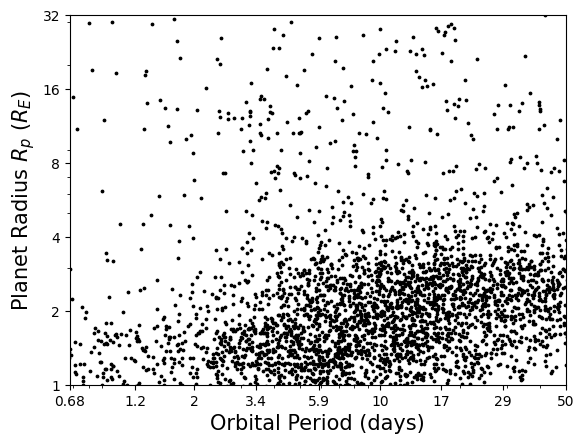

In [13]:
prads = kois_p50['koi_prad']
ppers = kois_p50['koi_period'] 

plt.scatter(ppers, prads, s=3, color='black')

# Set custom x-axis ticks and labels
plt.xscale('log')
xticks = [.68, 1.2, 2, 3.4, 5.9, 10, 17, 29, 50]
plt.xticks(xticks, labels=[str(tick) for tick in xticks])

# Set custom y-axis ticks and labels
plt.yscale('log')
yticks = [1, 2, 4, 8, 16, 32]
plt.yticks(yticks, labels=[str(tick) for tick in yticks])

# Set axis limits
plt.xlim([0.68, 50])
plt.ylim([1, 32])

plt.ylabel('Planet Radius $R_p$ ($R_E$)', fontsize=15)
plt.xlabel('Orbital Period (days)', fontsize=15)

plt.show()

## For the Orrery

The things we need are a list of systems that have multiple planets, the mass/radii of the planets, their orbital radii, their eccentricity, and the host star radius, temperature, and mass. 

In [47]:
class System:
    def __init__(self, kepid, star_mass, star_radius, star_teff, planets):
        """
        Represents a planetary system.
        
        Parameters:
        kepid (int): Kepler ID of the star
        star_mass (float): Mass of the star in solar masses
        star_radius (float): Radius of the star in solar radii
        star_teff (float): Effective temperature of the star (K)
        planets (list): List of planet names (e.g., [kepid-b, kepid-c])
        """
        self.kepid = kepid
        self.star_mass = star_mass
        self.star_radius = star_radius
        self.star_teff = star_teff
        self.planets = planets  # List of planet identifiers
        self.num_planets = len(planets)
    
    def __repr__(self):
        return (f"System(kepid={self.kepid}, star_mass={self.star_mass}, "
                f"star_radius={self.star_radius}, star_teff={self.star_teff}, "
                f"num_planets={self.num_planets}, planets={self.planets})")

In [48]:
class Planet:
    def __init__(self, kepid, planet_mass, planet_radius, period, semi_major_axis):
        """
        Represents a planet within a planetary system.
        
        Parameters:
        kepid (str): Identifier of the planet (e.g., 'KepID-b')
        planet_mass (float): Mass of the planet in Earth masses
        planet_radius (float): Radius of the planet in Earth radii
        period (float): Orbital period of the planet in days
        semi_major_axis (float): Semi-major axis of the planet's orbit in AU (assuming e=0)
        """
        self.kepid = kepid
        self.planet_mass = planet_mass
        self.planet_radius = planet_radius
        self.period = period
        self.semi_major_axis = semi_major_axis
    
    def __repr__(self):
        return (f"Planet(kepid={self.kepid}, planet_mass={self.planet_mass}, "
                f"planet_radius={self.planet_radius}, period={self.period}, "
                f"semi_major_axis={self.semi_major_axis})")

In [65]:
stars['kepid'] = stars['kepid'].astype(int)
kois['kepid'] = kois['kepid'].astype(int)
kois['koi_prad'] = pd.to_numeric(kois['koi_prad'], errors='coerce')

# Ensure numerical fields are properly converted to float
stars['mass'] = pd.to_numeric(stars['mass'], errors='coerce')
kois['koi_period'] = pd.to_numeric(kois['koi_period'], errors='coerce')

# Extract planetary system data
systems = []
G = 39.478  # AU^3 / (Msun * yr^2), gravitational constant in appropriate units

for _, star in stars.iterrows():
    planets = kois[kois['kepid'] == star['kepid']]
    planet_objects = []
    
    for _, planet in planets.iterrows():
        planet_id = planet.get('kepoi_name', f"{planet['kepid']}-unknown")
        period_days = float(planet.get('koi_period', float('nan')))
        period_years = period_days / 365.25  # Convert days to years
        star_mass = float(star.get('mass', float('nan')))
        
        semi_major_axis = ((G * star_mass * period_years ** 2) / (4 * math.pi ** 2)) ** (1/3) \
            if not math.isnan(star_mass) and not math.isnan(period_years) else float('nan')
        
        planet_obj = Planet(
            kepid=planet_id,
            planet_mass=planet.get('koi_prad', float('nan')) ** 2.9 if not math.isnan(planet.get('koi_prad', float('nan'))) else float('nan'),
            planet_radius=planet.get('koi_prad', float('nan')),
            period=period_days,
            semi_major_axis=semi_major_axis
        )
        planet_objects.append(planet_obj)
    
    if len(planet_objects) >= 3:  # at least 3 planets per system
        system = System(
            kepid=star['kepid'],
            star_mass=star.get('mass', float('nan')),
            star_radius=star.get('radius', float('nan')),
            star_teff=star.get('teff', float('nan')),
            planets=planet_objects
        )
        systems.append(system)


In [88]:
def plot_system(system):
    """
    Plots a planetary system with a central star and its planets.

    Parameters:
    system (System): The System object containing the star and its planets.
    """
    fig, ax = plt.subplots(figsize=(8, 4))

    # Star properties
    star_radius = float(system.star_radius) / 30
    star_x = 0  # Place the star at x=0

    # Planets properties
    planets_sorted = sorted(system.planets, key=lambda p: p.semi_major_axis)  # Sort by distance
    planet_xs = [p.semi_major_axis for p in planets_sorted]  # X positions in AU
    planet_radii = [float(p.planet_radius) / 109 for p in planets_sorted]  # Convert Earth radii to Solar radii

    # Plot the star
    ax.add_patch(plt.Circle((star_x, 0), star_radius, color='gold', label="Star"))

    # Plot planets
    for x, r, planet in zip(planet_xs, planet_radii, planets_sorted):
        ax.add_patch(plt.Circle((x, 0), r, color='blue', alpha=0.7, label=f"Planet {planet.kepid}"))

    # Axis settings
    ax.set_xlim(-0.2, max(planet_xs) + 0.2)
    ax.set_ylim(-1.5 * star_radius, 1.5 * star_radius)
    ax.set_xlabel("Distance from star (AU)")
    ax.set_ylabel("Size Scale")
    ax.set_aspect('equal')
    ax.set_title(f"System {system.kepid}")

    plt.show()

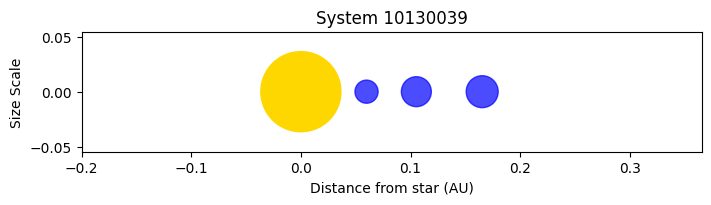

In [89]:
plot_system(systems[0])

In [72]:
systems[0]

System(kepid=10130039, star_mass=0.957, star_radius=1.095, star_teff=5782, num_planets=3, planets=[Planet(kepid=K01909.01, planet_mass=3.178631467010915, planet_radius=1.49, period=12.75800092, semi_major_axis=0.1053005689199108), Planet(kepid=K01909.02, planet_mass=1.4997668052981619, planet_radius=1.15, period=5.47033376, semi_major_axis=0.059875825580476806), Planet(kepid=K01909.03, planet_mass=3.837528912447497, planet_radius=1.59, period=25.0985083, semi_major_axis=0.16532590364473512)])